# Exercise 1
### Cryptanalysis
- Though encryption is primarily designed to preserve confidentiality and integrity of data, the mechanism itself is vulnerable to brute force (statistical analysis). 
- In other words, the more we see the encrypted data, the easier we can hack it.

**Cipher text:**

`PRCSOFQX FP QDR AFOPQ CZSPR LA JFPALOQSKR. QDFP FP ZK LIU BROJZK MOLTROE`.

### Tasks
1. In this exercise, you are asked to crack the following cipher text. Please provide the decrypted result and explain your strategy in decrypting this text.
2. Count the frequency of letters. 
    - List the top three most frequent characters.
3. Knowing that this is English, what are commonly used three-letter words and two-letter words. 
    - Does the knowledge give you a hint on cracking the given text?
4. Cracking the given text. 
    - Measure the time that you have taken to crack this message.
5. Create a simple python program for cracking the Caesar cipher text using brute force attack. 
    - Explain the design and demonstrate your software. (You may use an English dictionary for validating results.)

### Answer:

- The most common letters are P:7, R,O,F:6, and Q:5.
- The most common 2 to 3 letter words in English are:
    - to, of, in, it, is, as, at, be, we, he, so, on, an, or, do, if, up, by, my

- Deciphering (15ish minutes)
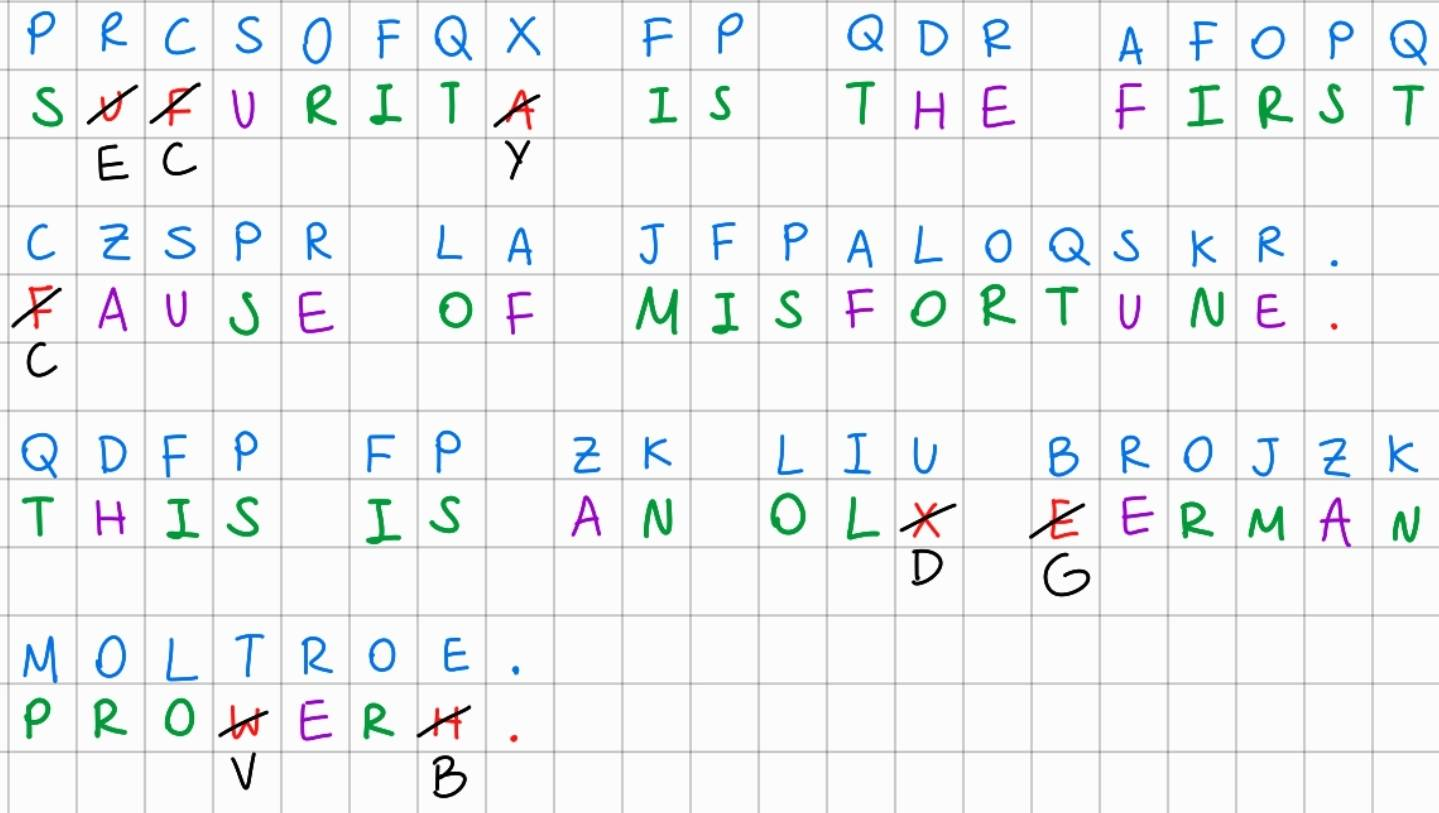
1. Used Caesar to try to decrypt -> resulting in the green letters
2. Then guess using common words/letters FP -> IS, QDR -> THE and work from there -> purple letters
3. Guess the left over letters to finish the process -> black letters.


In [36]:
cipher_text = "PRCSOFQX FP QDR AFOPQ CZSPR LA JFPALOQSKR. QDFP FP ZK LIU BROJZK MOLTROE"

frequency = {}

for char in cipher_text:
    if char.isalpha():
        frequency[char] = frequency.get(char, 0) + 1

# sort letters by frequency (highest first)
sorted_frequency = sorted(frequency.items(), key=lambda x: x[1], reverse=True)

print("Letter frequencies:")
for letter, count in sorted_frequency[:5]:
    print(letter, ":", count)


Letter frequencies:
P : 7
R : 6
O : 6
F : 6
Q : 5


In [37]:
cipher_text = "PRCSOFQX FP QDR AFOPQ CZSPR LA JFPALOQSKR. QDFP FP ZK LIU BROJZK MOLTROE"

# Standard English letter frequency order
english_freq_order = "ETAOINSHRDLCUMFYWGPBVKXQJZ"

# Count frequency of letters in ciphertext
freq = {}
for c in cipher_text:
    if c.isalpha():
        freq[c] = freq.get(c, 0) + 1

# Sort ciphertext letters by frequency (highest first)
sorted_cipher_letters = sorted(freq, key=freq.get, reverse=True)

# Create substitution mapping
substitution = {}
for i in range(len(sorted_cipher_letters)):
    substitution[sorted_cipher_letters[i]] = english_freq_order[i]

# Apply substitution
decrypted_guess = ""
for c in cipher_text:
    if c.isalpha():
        decrypted_guess += substitution[c]
    else:
        decrypted_guess += c

print("Frequency Substitution Attempt:")
print(decrypted_guess)


Frequency Substitution Attempt:
ETLSAOIM OE ICT HOAEI LRSET NH UOEHNAISDT. ICOE OE RD NFY WTAURD GANPTAB


In [32]:
def caesar_decrypt(text, shift):
    result = ""
    for c in text:
        if c.isalpha():
            result += chr((ord(c) - ord('A') + shift) % 26 + ord('A'))
        else:
            result += c
    return result

cipher = "PRCSOFQX FP QDR AFOPQ CZSPR LA JFPALOQSKR. QDFP FP ZK LIU BROJZK MOLTROE"

print("Caesar Cipher Attempt:")
for i in range(26):
    print(i, caesar_decrypt(cipher, i))


Caesar Cipher Attempt:
0 PRCSOFQX FP QDR AFOPQ CZSPR LA JFPALOQSKR. QDFP FP ZK LIU BROJZK MOLTROE
1 QSDTPGRY GQ RES BGPQR DATQS MB KGQBMPRTLS. REGQ GQ AL MJV CSPKAL NPMUSPF
2 RTEUQHSZ HR SFT CHQRS EBURT NC LHRCNQSUMT. SFHR HR BM NKW DTQLBM OQNVTQG
3 SUFVRITA IS TGU DIRST FCVSU OD MISDORTVNU. TGIS IS CN OLX EURMCN PROWURH
4 TVGWSJUB JT UHV EJSTU GDWTV PE NJTEPSUWOV. UHJT JT DO PMY FVSNDO QSPXVSI
5 UWHXTKVC KU VIW FKTUV HEXUW QF OKUFQTVXPW. VIKU KU EP QNZ GWTOEP RTQYWTJ
6 VXIYULWD LV WJX GLUVW IFYVX RG PLVGRUWYQX. WJLV LV FQ ROA HXUPFQ SURZXUK
7 WYJZVMXE MW XKY HMVWX JGZWY SH QMWHSVXZRY. XKMW MW GR SPB IYVQGR TVSAYVL
8 XZKAWNYF NX YLZ INWXY KHAXZ TI RNXITWYASZ. YLNX NX HS TQC JZWRHS UWTBZWM
9 YALBXOZG OY ZMA JOXYZ LIBYA UJ SOYJUXZBTA. ZMOY OY IT URD KAXSIT VXUCAXN
10 ZBMCYPAH PZ ANB KPYZA MJCZB VK TPZKVYACUB. ANPZ PZ JU VSE LBYTJU WYVDBYO
11 ACNDZQBI QA BOC LQZAB NKDAC WL UQALWZBDVC. BOQA QA KV WTF MCZUKV XZWECZP
12 BDOEARCJ RB CPD MRABC OLEBD XM VRBMXACEWD. CPRB RB LW XUG NDAVLW YAXFDAQ

# Exercise 2
### Cryptanalysis on Symmetric Encryption
Vigenère is a complex version of the Caesar cipher. It is a polyalphabetic substitution. 
    - Please review Kasiski examination and explain how it can be used to attack Vigenère.

### Answer:
The Kasiski examination finds repeated ciphertext sequences and measures the distance between them. The greatest common divisors of these distances will reveal the key length. Once we know the key length, the cypher can be reduced into multiple Caesar ciphers that can be solved via frequency analysis.

# Exercise 3
### Mode in Block Cipher
Block Cipher is designed to have more randomness in a block. However, an individual block still utilizes the same key. Thus, it is recommended to use a cipher mode with an initial vector, chaining or feedback between blocks. This exercise will show you the weakness of Electronic Code Book mode which does not include any initial vector, chaining or feedback.

1. Find a bitmap image that is larger than 2000x2000 pixels. Note that you may resize any image. To simplify the pattern, we will change it to bitmap (1-bit per pixel) using the portable bitmap format (pbm). In this example, we will use imagemagick for the conversion.
`$ magick convert image.jpg -resize 2000x2000 org.pbm`

2. The NetPBM format is a naive image format. The first two lines contain a header (format and size in pixel). Depending on the format, the pixels can be represented in either binary and ascii. For our exercise, we prefer binary. However, we first have to take out the header to prevent the encryption from encoding the header. To do so, use your text editor (eg. vi, notepad) to take out the first two lines.

```binary
$ cp org.pbm org.x
$ vi org.x
P4
2000 2000
KR)B@HD��@H�
```

3. Encrypt the file with OpenSSL with any block cipher algorithm in ECB mode (no padding and no salt).

```shell
$ openssl enc -aes-256-ecb -in org.x -nosalt \
    -out enc.x
```

4. Pad the header back and see the result.

```binary
$ cp enc.x enc.pbm
$ vi enc.pbm
P4
2000 2000
KR)B@HD��@
```

5. You may try it with other modes with IV, chaining, or feedback and compare the result.

6. What does the result suggest about the mode of operation in block cipher? Please provide your analysis.

If you got it all right, the result should be like this
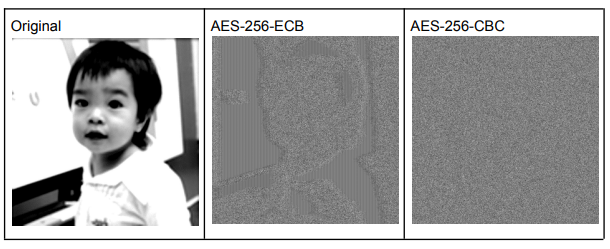

### Answer:

ECB should leak structural information. This is because plain text produces identical ciphertext blocks, thus preserving visible patterns and reducing randomness. However, I could not get the structure to show in my image. Nevertheless, it is still more structured than CBC.
As for CBC, it introduces dependency between blocks, therefore producing a more random output. This hides all patterns and provides stronger confidentiality.

Original

![Original Hedgehog.png](<attachment:Original Hedgehog.png>)

AES-256-ECB

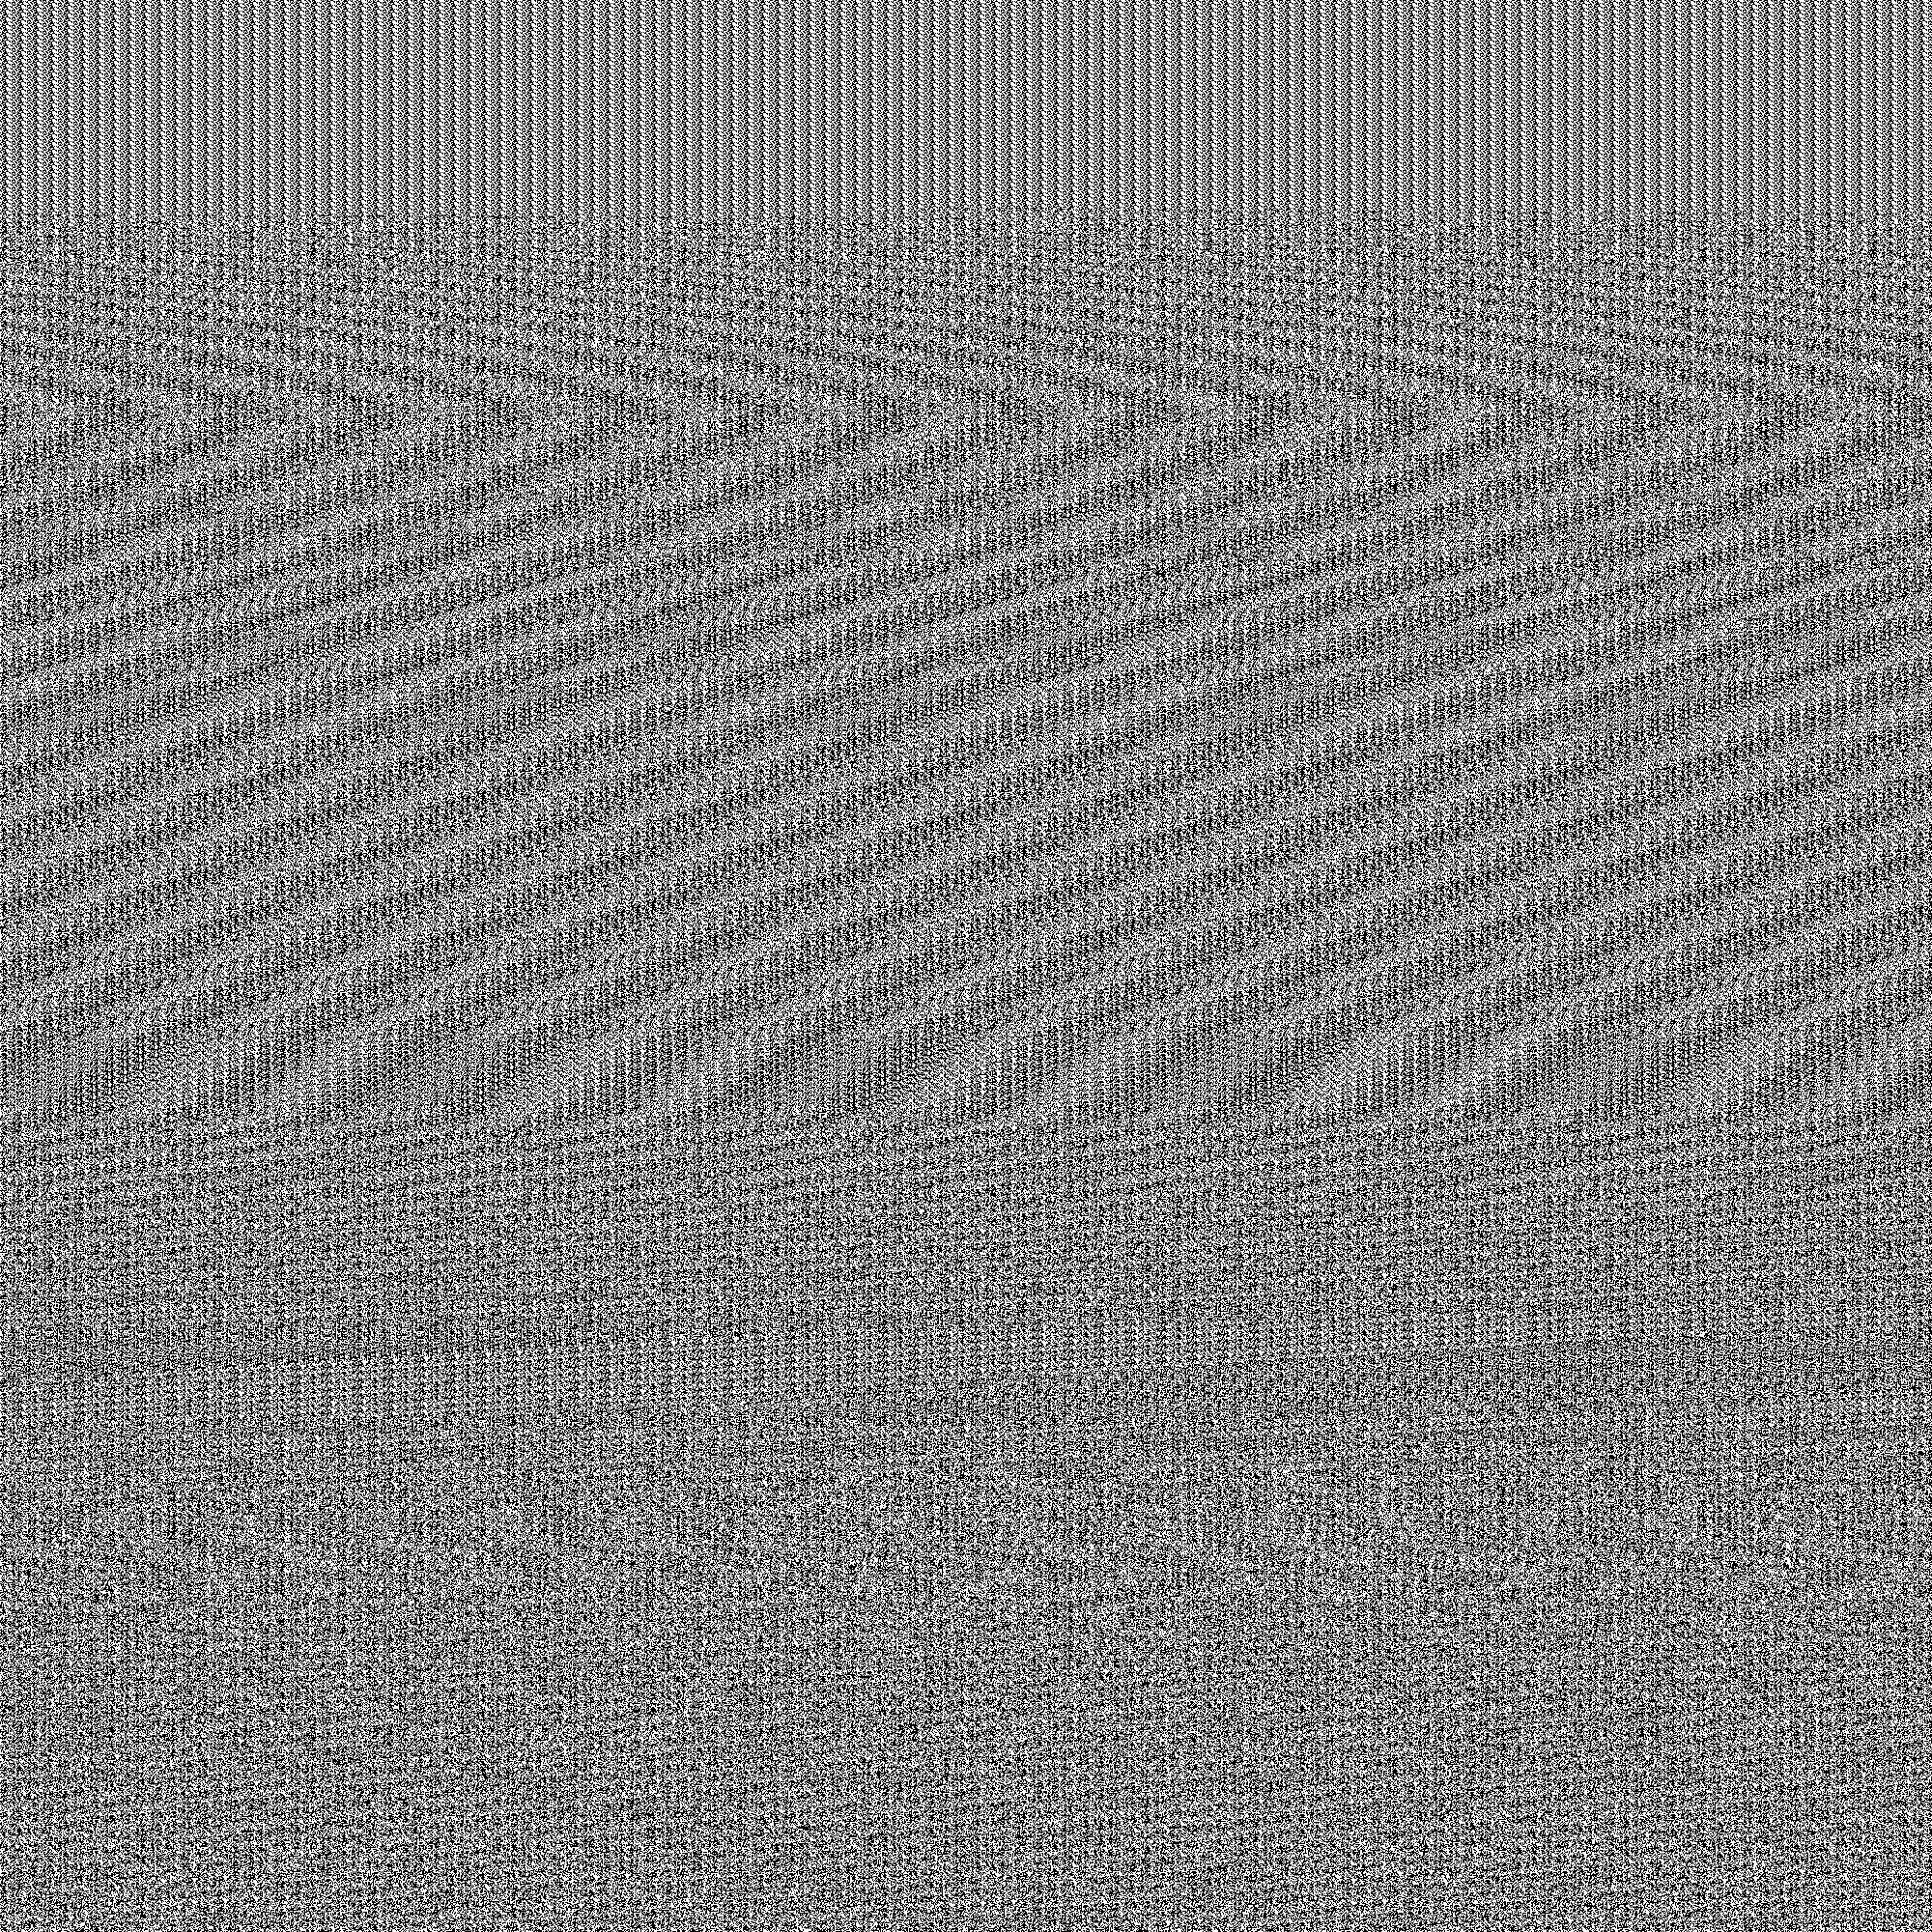

AES-256-CBC

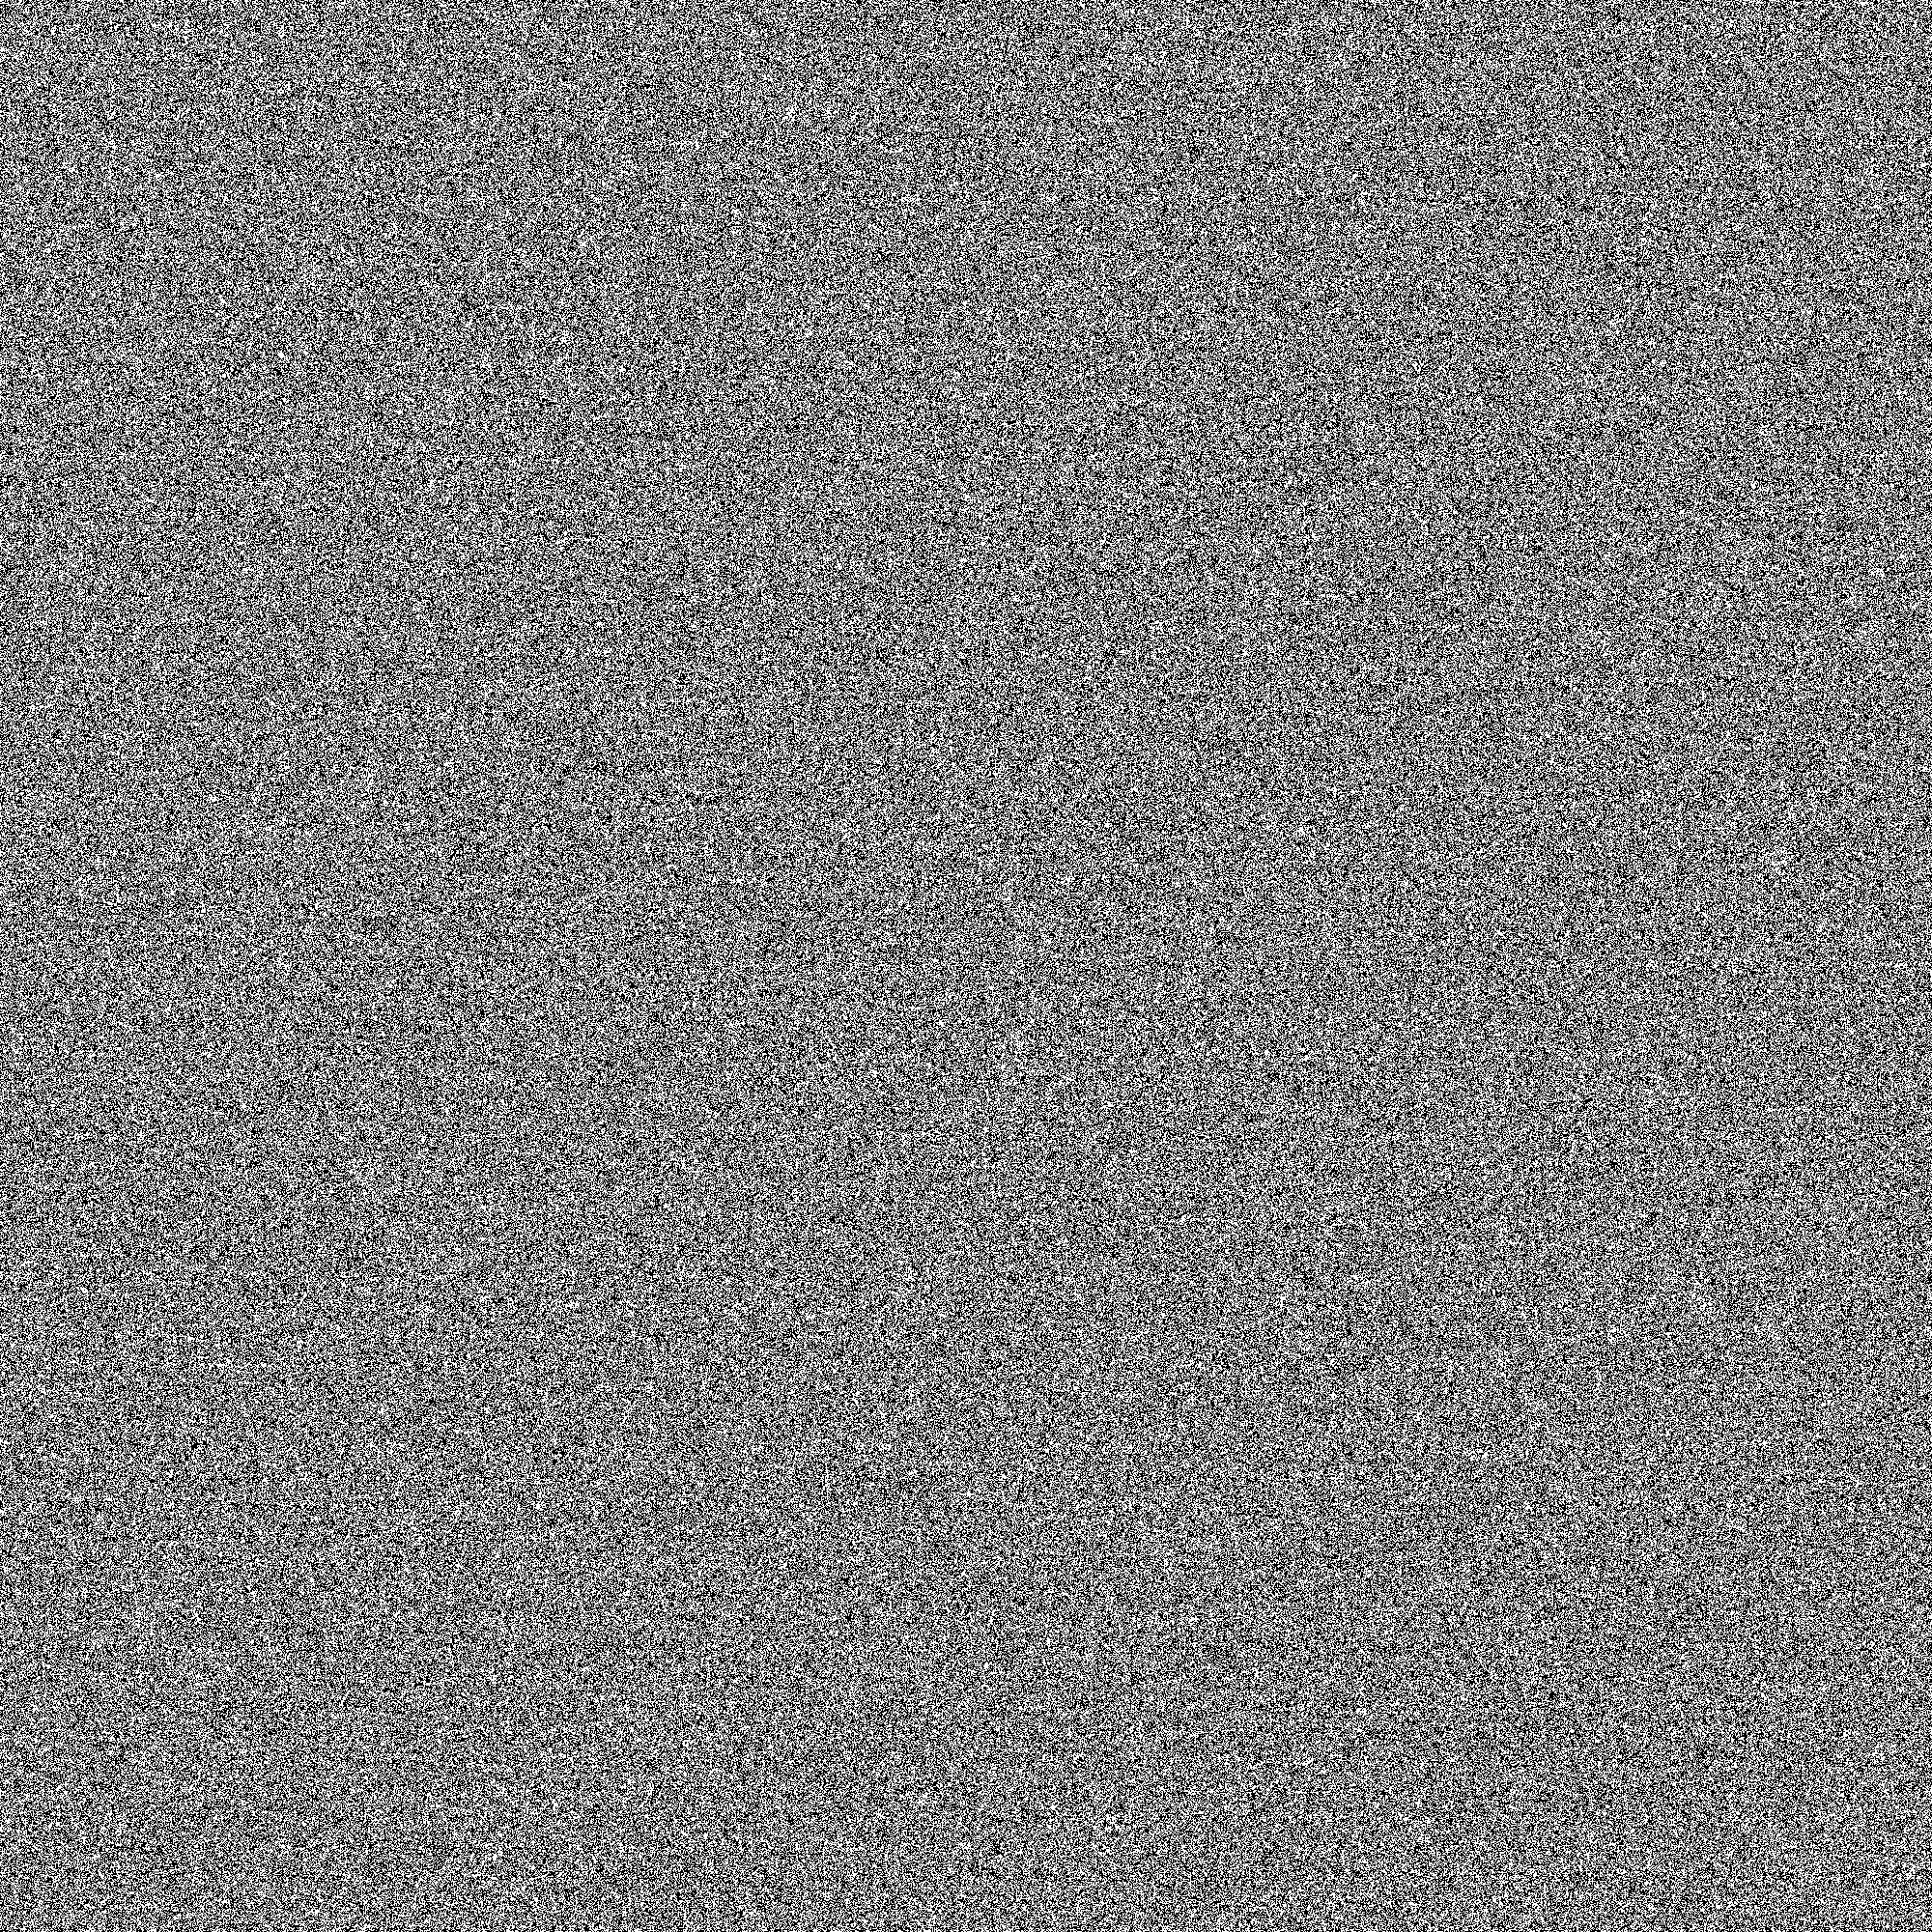
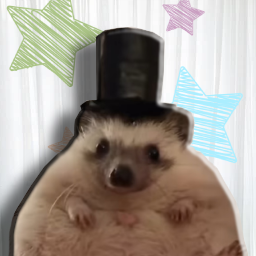

# Exercise 4 - 
### Encryption Protocol - Digital Signature
- Measure the performance of a hash function (sha1), RC4, Blowfish and DSA. Outline your experimental design. 
    - (Please use OpenSSL for your measurement)
- Comparing performance and security provided by each method.
- Explain the mechanism underlying Digital Signature. How does it combine the strength and weakness of each encryption scheme?

Hint: (OpenSSL command line)

In [ ]:
# List algorithms
$ openssl list cipher-algorithms
# To encrypt
$ openssl enc -ciphername [options] -e -in filename -out filename \
-K key -iv IV -nopad -nosalt

### Answer:
SHA1 showed very high throughput, whereas DSA is significantly slower with signing slower than verification and performance decreasing as key size increased. However, I could not get RC4 and BF to run. According to chatGPT, it is due to OpenSSL blocking it due to being obsolete and a security vunerability.

In summary, this experiment showed that fast algorithms lacks security. Digital signatures solve this by combining a fast hash function with slower but secure asymmetric encryption, achieving data integrity, authentication, and non-repudiation without sacrificing overall performance.

### Table 1: Performance Measurement (OpenSSL speed results)

| Algorithm | Type              | Key / Block Size | Performance Result | Notes                             |
| --------- | ----------------- | ---------------- | ------------------ | --------------------------------- |
| SHA-1     | Hash              | N/A              | ~2.4–2.6 GB/s      | Very fast, but weak to collisions |
| RC4       | Stream Cipher     | N/A              | Not supported      | Deprecated, insecure              |
| Blowfish  | Block Cipher      | 64-bit block     | Not supported      | Deprecated, legacy only           |
| DSA       | Digital Signature | 1024 / 2048 bits | 5k–17k ops/s       | Slower, but secure                |

### Table 2: Security Comparison

| Algorithm | Speed     | Security Level | Purpose                          |
| --------- | --------- | -------------- | -------------------------------- |
| SHA-1     | Very fast | Weak           | Data integrity                   |
| RC4       | Very fast | Broken         | Confidentiality                  |
| Blowfish  | Fast      | Obsolete       | Confidentiality                  |
| DSA       | Slow      | Strong         | Authentication & non-repudiation |

